<a href="https://colab.research.google.com/github/suinkangme/COMP432-GroupI/blob/main/data_loading_preprocessing_set3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. LOAD DATASET**

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1JQ9FaP6SBWlCB3ynxzmUTjDRAB9hc9mL/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1JQ9FaP6SBWlCB3ynxzmUTjDRAB9hc9mL
To: /content/Dataset_3.zip
100% 275M/275M [00:05<00:00, 53.1MB/s]


In [ ]:
!unzip /content/Dataset_3.zip

Streaming output truncated to the last 5000 lines.
  inflating: Animal Faces/cat/pixabay_cat_003744.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003745.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003746.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003747.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003749.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003750.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003751.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003752.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003754.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003756.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003757.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003758.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003759.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003760.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003761.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003762.jpg  
  inflating: Animal Faces/cat/pixabay_cat_003763.jpg  
  inflating: A

**2. DATASET PREPROCESSING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
# Define paths
base_dir = '/content/Animal Faces'
classes = ['cat', 'dog', 'wild']

In [11]:
# Initialize the ImageDataGenerator with rescaling and augmentations
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing the pixel values
    rotation_range=20,  # Slight rotation, avoid extreme angles
    width_shift_range=0.1,  # Horizontal shifts
    height_shift_range=0.1,  # Vertical shifts
    horizontal_flip=True,  # Flipping images horizontally
    zoom_range=0.2,  # Slight zooming in or out
    brightness_range=(0.8, 1.2),  # Adjusting brightness
    fill_mode='nearest'  # Fill strategy for new pixels after rotation/shift
)

The augmentations done are as follows:


1. **rescale=1./255:** This is a normalization step. Pixel values in images are usually between 0 and 255. By rescaling them to a range of 0 to 1, the model can more easily process these values. Normalization is a common preprocessing step in many machine learning and deep learning pipelines.

2. **rotation_range=20:** This parameter allows the generator to randomly rotate the image within a range of ±20 degrees. This introduces variance in the orientation of the objects within the images, helping the model learn to recognize objects in different orientations.

3. **width_shift_range=0.1 and height_shift_range=0.1:** These parameters let the generator randomly shift the image horizontally and vertically. A shift range of 0.1 means that the image can be shifted up to 10% of its total width or height. This helps the model handle cases where the object of interest isn’t perfectly centered in the image.

4. **horizontal_flip=True:** This allows the generator to randomly flip the image horizontally (like a mirror image). This is particularly useful for natural images where the orientation can vary but the class label remains the same. For example, a cat facing left or right is still a cat.

5. **zoom_range=0.2:** This parameter allows random zooming of the image by up to 20%. Zooming in or out can help the model learn to recognize objects at different scales.

6. **brightness_range=(0.8, 1.2):** This adjusts the brightness of the image by a factor chosen randomly within the given range. In this case, the brightness of the image can be adjusted to be between 80% and 120% of the original brightness. This augmentation can make the model robust to different lighting conditions.

7. **fill_mode='nearest':** When an image is rotated or shifted, some new pixels will be created to fill in the gaps. The `fill_mode` specifies how these pixels are filled. The 'nearest' mode fills these pixels with the nearest pixel values. This is a way to preserve the overall visual context of the image after augmentation.


Found 6000 images belonging to 3 classes.


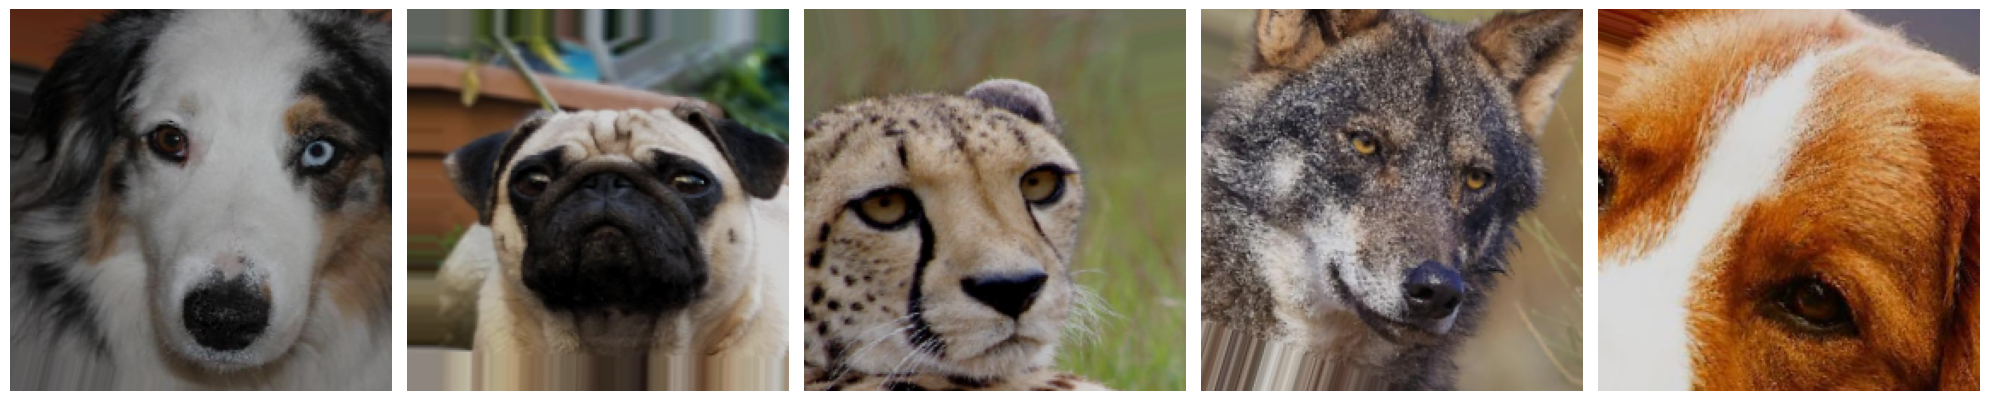

In [12]:
# Visually verify if the augmented images look correct
augmented_data_gen = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    batch_size=16,
    target_size=(224, 224),
    color_mode='rgb',
    shuffle=True
)

# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Generate a batch of augmented images
augmented_images, _ = next(augmented_data_gen)

# Convert the images to unsigned integers for display
augmented_images = (augmented_images * 255).astype('uint8')

# Plot the images
plot_images(augmented_images[:5])  # Plotting 5 images, change as needed

In [13]:
from PIL import UnidentifiedImageError

# Function to load the images
def load_images_and_labels(class_dirs, base_dir, target_size=(224, 224)):
    images = []
    labels = []
    for label, class_dir in enumerate(class_dirs):
        class_folder = os.path.join(base_dir, class_dir)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = load_img(img_path, target_size=target_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(label)
            except UnidentifiedImageError as e:
                print(f'Could not load image: {img_path}. Error: {e}')
    return np.array(images), np.array(labels)

In [14]:
# Load all the images and labels
images, labels = load_images_and_labels(classes, base_dir)

Could not load image: /content/Animal Faces/cat/.DS_Store. Error: cannot identify image file <_io.BytesIO object at 0x7f6987368f40>
Could not load image: /content/Animal Faces/dog/.DS_Store. Error: cannot identify image file <_io.BytesIO object at 0x7f6987334860>
Could not load image: /content/Animal Faces/wild/.DS_Store. Error: cannot identify image file <_io.BytesIO object at 0x7f698770aac0>


**This part is used to visually compare a small subset of the original images and the augmented images**

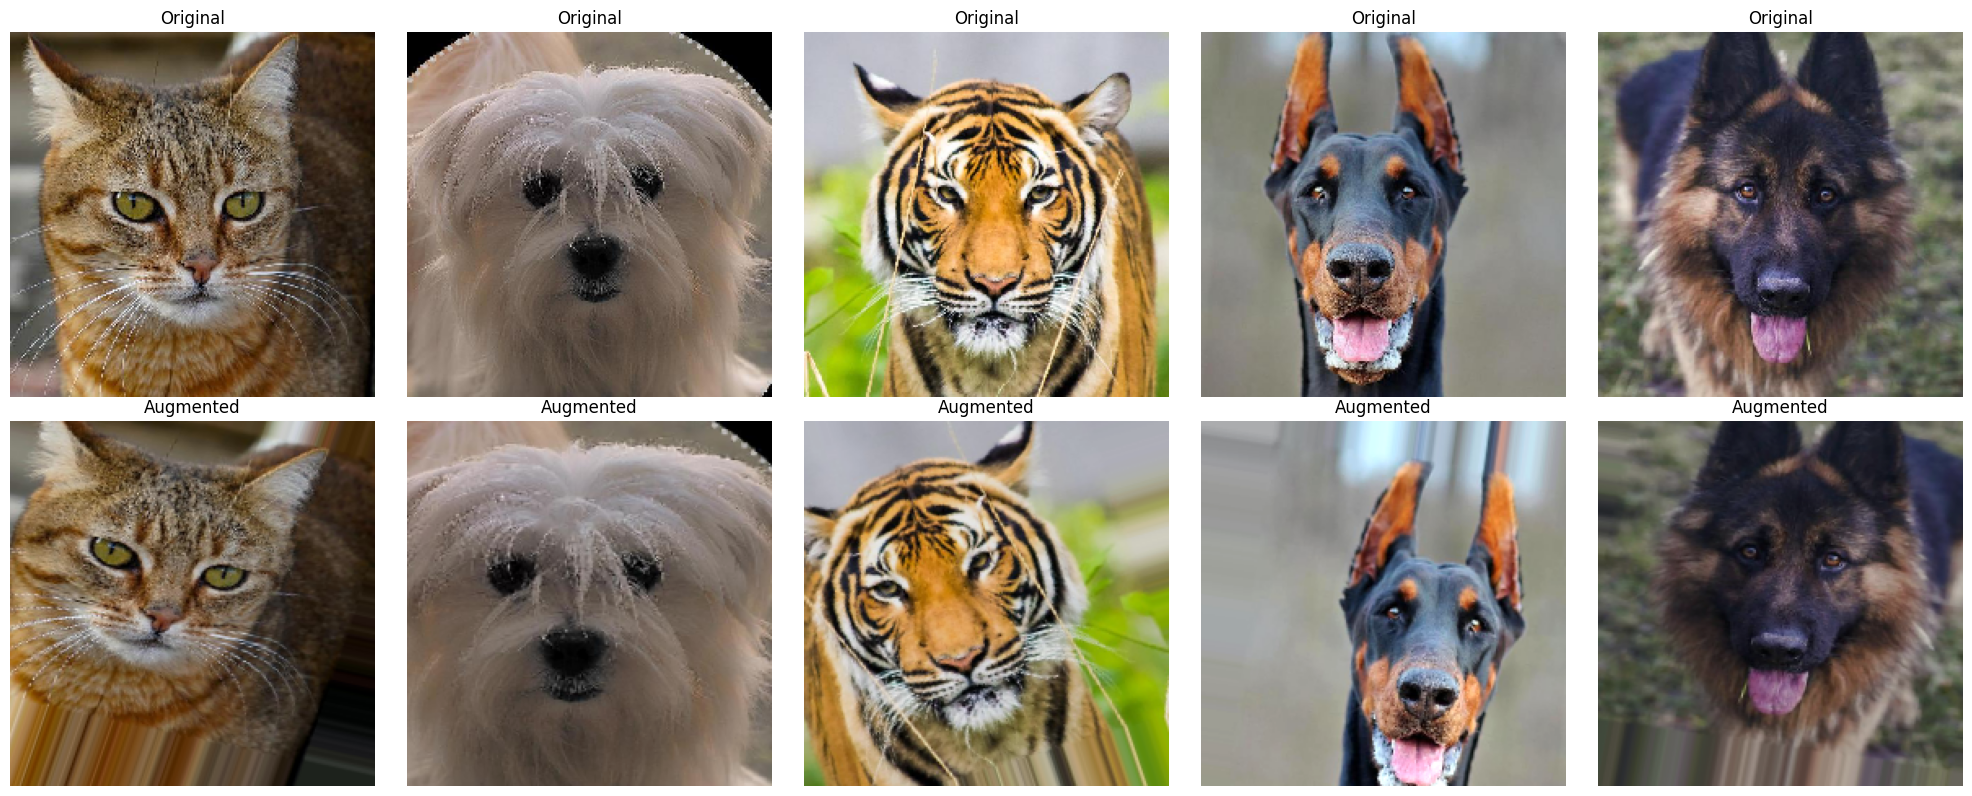

In [15]:
num_images_to_augment = 5
indices = np.random.choice(len(images), num_images_to_augment, replace=False)
selected_images = images[indices]
selected_labels = labels[indices]

# Function to plot images side by side for comparison
def plot_images_side_by_side(original_images, augmented_images):
    assert len(original_images) == len(augmented_images), "The number of original and augmented images must match"

    num_images = len(original_images)
    fig, axes = plt.subplots(2, num_images, figsize=(20, 8))  # Two rows: one for original, one for augmented
    axes = axes.ravel()

    for i in range(num_images):
        # Original images on the top row
        axes[i].imshow(original_images[i].astype('uint8'))
        axes[i].set_title('Original')
        axes[i].axis('off')

        # Corresponding augmented images on the bottom row
        axes[i + num_images].imshow(augmented_images[i].astype('uint8'))
        axes[i + num_images].set_title('Augmented')
        axes[i + num_images].axis('off')

    plt.tight_layout()
    plt.show()

# Create a generator for the selected images
image_gen = datagen.flow(selected_images, selected_labels, batch_size=num_images_to_augment, shuffle=False)

# Get the augmented images
selected_augmented_images, _ = image_gen.next()
selected_augmented_images_uint8 = np.clip(selected_augmented_images * 255, 0, 255).astype('uint8')

# Plot the images
plot_images_side_by_side(selected_images, selected_augmented_images_uint8)

In [16]:
# Apply data augmentation and normalization
augmented_images = datagen.flow(images, labels, batch_size=len(images), shuffle=True).next()

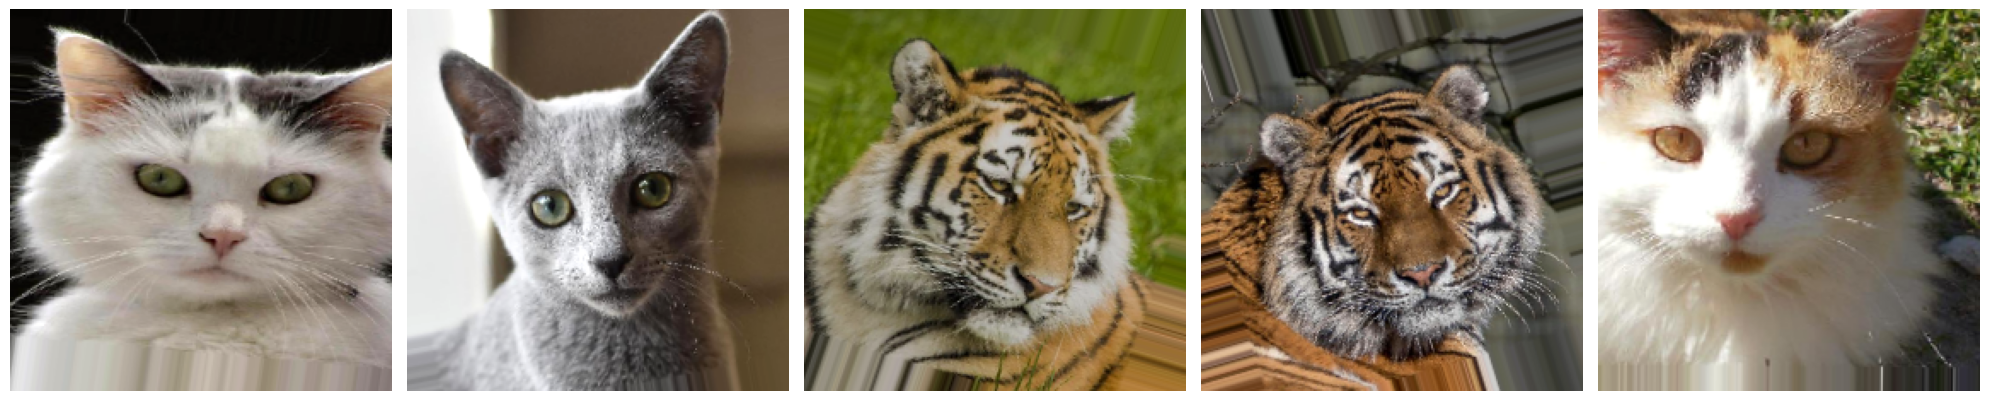

In [17]:
# Verify if the images are augmented correctly

# 'augmented_images' is a tuple where the first element is the image batch
# and the second element is the label batch. Need to separate them first.
augmented_images_batch, augmented_labels_batch = augmented_images

# Now 'augmented_images_batch' is the NumPy array you want to inspect.
# Select a random subset of images to display
num_images_to_display = 5
random_indices = np.random.choice(augmented_images_batch.shape[0], num_images_to_display, replace=False)
selected_images = augmented_images_batch[random_indices]

# Convert the selected images to unsigned integers for display if they have been rescaled
selected_images_uint8 = (selected_images * 255).astype('uint8')

# Use the plot_images function to display the selected images
plot_images(selected_images_uint8)


In [18]:
# Split the data and save the sets into npy arrays

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(
    augmented_images_batch, augmented_labels_batch,
    test_size=0.2,
    random_state=42
)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Save the splits to .npz files

np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 3/train_data.npz', images=X_train, labels=y_train)
np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 3/test_data.npz', images=X_test, labels=y_test)

In [22]:
print(f"Unique labels in dataset: {np.unique(labels)}")

Unique labels in dataset: [0 1 2]


In [24]:
# Load the training data
train_data = np.load('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 3/train_data.npz')
X_train = train_data['images']
y_train = train_data['labels']

# Load the testing data
test_data = np.load('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 3/test_data.npz')
X_test = test_data['images']
y_test = test_data['labels']


In [25]:
print(f"Unique labels in training set: {np.unique(y_train)}")
print(f"Unique labels in test set: {np.unique(y_test)}")

Unique labels in training set: [0 1 2]
Unique labels in test set: [0 1 2]


In [26]:
(unique, counts) = np.unique(y_train, return_counts=True)
print(f"Training set class distribution: {dict(zip(unique, counts))}")

(unique, counts) = np.unique(y_test, return_counts=True)
print(f"Test set class distribution: {dict(zip(unique, counts))}")

Training set class distribution: {0: 1607, 1: 1583, 2: 1610}
Test set class distribution: {0: 393, 1: 417, 2: 390}


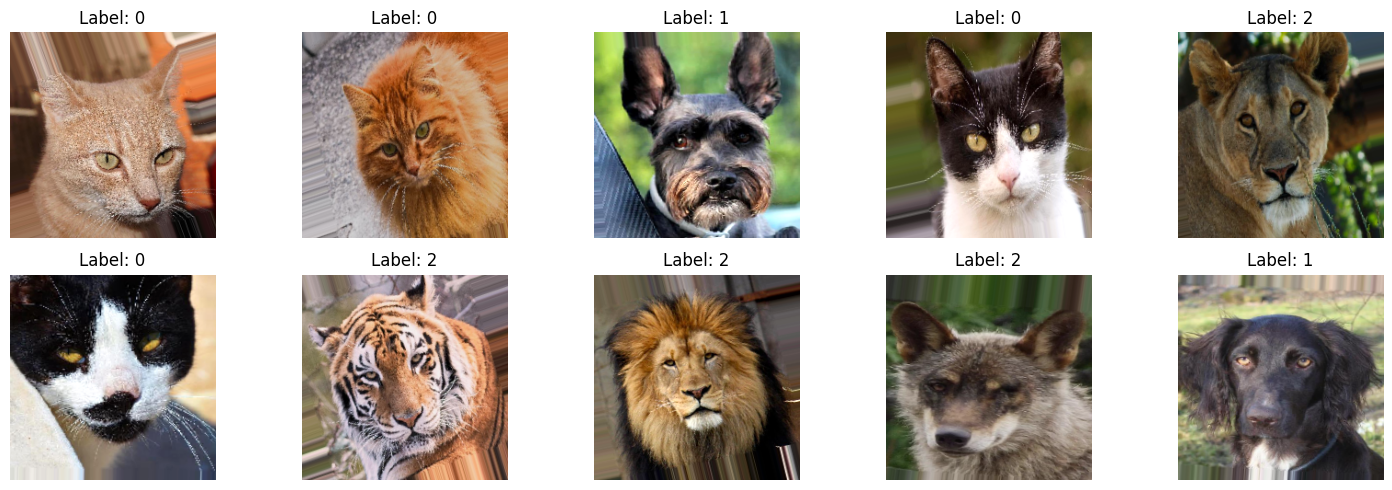

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot images in a grid
def plot_images(images, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    axes = axes.ravel()
    idxs = np.random.choice(len(images), num_rows * num_cols, replace=False)
    for i, ax in enumerate(axes):
        ax.imshow(images[idxs[i]])
        ax.set_title(f"Label: {labels[idxs[i]]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot random images with labels
plot_images(X_train, y_train)
